In [170]:
import datetime as dt
import sqlite3
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

In [171]:
# Connect to full data set
cnx = sqlite3.connect('FPA_FOD_20210617.sqlite')

cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor. fetchall())

df = pd.read_sql_query("SELECT * FROM Fires", cnx)

[('NWCG_UnitIDActive_20200123',), ('Fires',)]


In [172]:
df = pd.read_sql_query("SELECT * FROM Fires", cnx)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166753 entries, 0 to 2166752
Data columns (total 37 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   FOD_ID                         int64  
 1   FPA_ID                         object 
 2   SOURCE_SYSTEM_TYPE             object 
 3   SOURCE_SYSTEM                  object 
 4   NWCG_REPORTING_AGENCY          object 
 5   NWCG_REPORTING_UNIT_ID         object 
 6   NWCG_REPORTING_UNIT_NAME       object 
 7   SOURCE_REPORTING_UNIT          object 
 8   SOURCE_REPORTING_UNIT_NAME     object 
 9   LOCAL_FIRE_REPORT_ID           object 
 10  LOCAL_INCIDENT_ID              object 
 11  FIRE_CODE                      object 
 12  FIRE_NAME                      object 
 13  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 14  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 15  MTBS_ID                        object 
 16  MTBS_FIRE_NAME                 object 
 17  COMPLEX_NAME                   object 
 18  FI

In [174]:
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County


In [183]:
df_co = df.loc[df['STATE'] == "CO"]

In [184]:
df_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61226 entries, 47 to 2166726
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FOD_ID                         61226 non-null  int64  
 1   FPA_ID                         61226 non-null  object 
 2   SOURCE_SYSTEM_TYPE             61226 non-null  object 
 3   SOURCE_SYSTEM                  61226 non-null  object 
 4   NWCG_REPORTING_AGENCY          61226 non-null  object 
 5   NWCG_REPORTING_UNIT_ID         61226 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME       61226 non-null  object 
 7   SOURCE_REPORTING_UNIT          61226 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME     61226 non-null  object 
 9   LOCAL_FIRE_REPORT_ID           15274 non-null  object 
 10  LOCAL_INCIDENT_ID              37902 non-null  object 
 11  FIRE_CODE                      21806 non-null  object 
 12  FIRE_NAME                      54081 non-nu

In [185]:
df_co.isna().sum() 

FOD_ID                               0
FPA_ID                               0
SOURCE_SYSTEM_TYPE                   0
SOURCE_SYSTEM                        0
NWCG_REPORTING_AGENCY                0
NWCG_REPORTING_UNIT_ID               0
NWCG_REPORTING_UNIT_NAME             0
SOURCE_REPORTING_UNIT                0
SOURCE_REPORTING_UNIT_NAME           0
LOCAL_FIRE_REPORT_ID             45952
LOCAL_INCIDENT_ID                23324
FIRE_CODE                        39420
FIRE_NAME                         7145
ICS_209_PLUS_INCIDENT_JOIN_ID    60513
ICS_209_PLUS_COMPLEX_JOIN_ID     61225
MTBS_ID                          60959
MTBS_FIRE_NAME                   60959
COMPLEX_NAME                     61173
FIRE_YEAR                            0
DISCOVERY_DATE                       0
DISCOVERY_DOY                        0
DISCOVERY_TIME                    4709
NWCG_CAUSE_CLASSIFICATION            0
NWCG_GENERAL_CAUSE                   0
NWCG_CAUSE_AGE_CATEGORY          60859
CONT_DATE                

In [186]:
# Drop unused columns
df_co.drop(columns=['FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_AGENCY', 
                    'NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID',
                    'SOURCE_REPORTING_UNIT', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'MTBS_ID',
                    'MTBS_FIRE_NAME', 'COMPLEX_NAME'], axis=1, inplace=True)


In [187]:
df_co.head()

,FOD_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_COMPLEX_JOIN_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
47,48,Pike San Isabel National Forest,BEX1,HATCH,None,2005,6/14/2005 0:00,165,1300.0,Natural,...,1530.0,0.5,B,39.292222,-105.183056,USFS,CO,None,None,None
61,62,Pike San Isabel National Forest,BEX1,TROUT CREEK II,None,2005,5/30/2005 0:00,150,1100.0,Natural,...,1218.0,0.2,A,38.913333,-105.983611,USFS,CO,None,None,None
62,63,Pike San Isabel National Forest,BU9J,MT ELBERT,None,2005,6/21/2005 0:00,172,1241.0,Human,...,1506.0,0.1,A,39.100278,-106.367500,USFS,CO,None,None,None
114,117,Pike San Isabel National Forest,BEX1,8GN,None,2005,7/7/2005 0:00,188,1907.0,Natural,...,2130.0,80.0,C,37.345000,-102.805833,USFS,CO,None,None,None
205,209,Pike San Isabel National Forest,BT83,BEAVER,None,2005,6/13/2005 0:00,164,1428.0,Human,...,1736.0,2.5,B,38.891111,-105.431944,STATE OR PRIVATE,CO,None,None,None


In [188]:
#fig, ax = plt.subplots()
years = df_co.FIRE_YEAR.unique()
years

array([2005, 2006, 2007, 2008, 2009, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018])

/var/folders/8x/96fv9lvs3ts4pvsg8w_06j4r0000gn/T/ipykernel_5870/3707809569.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_co.corr(),annot=True,cmap='viridis',linewidths=.5)


<AxesSubplot: >

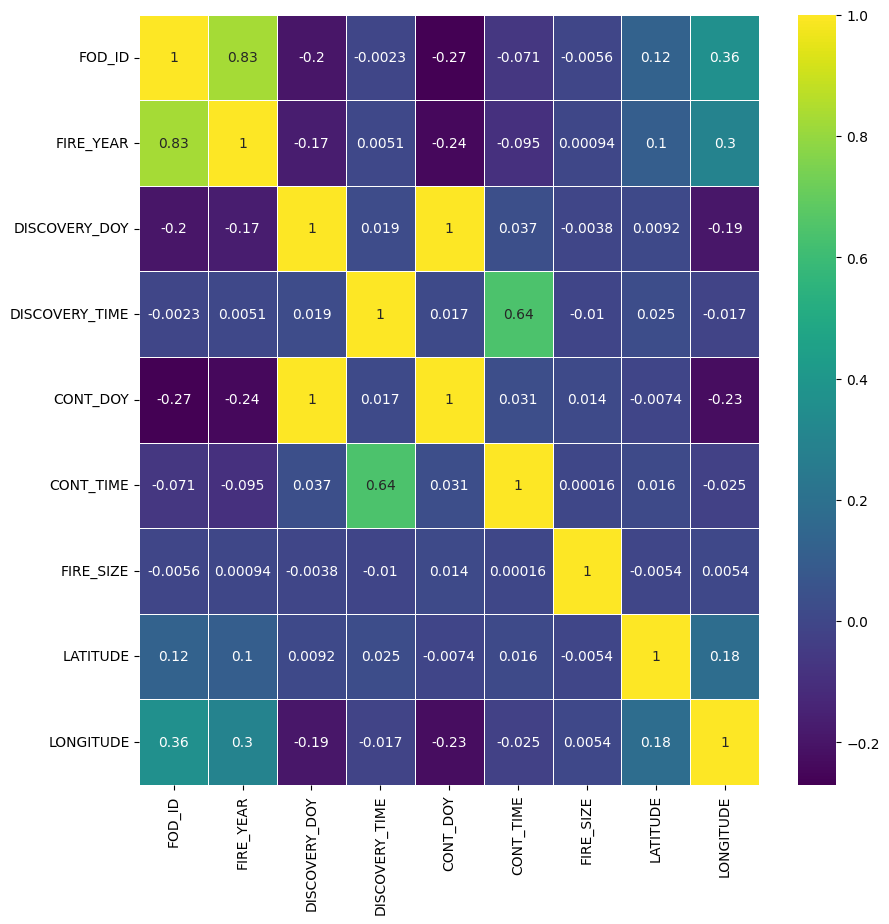

In [189]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_co.corr(),annot=True,cmap='viridis',linewidths=.5)

/var/folders/8x/96fv9lvs3ts4pvsg8w_06j4r0000gn/T/ipykernel_5870/3349346790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(df_co.corr())


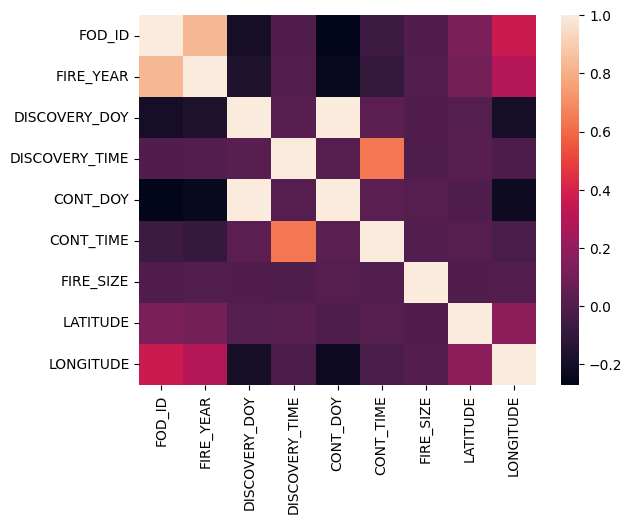

In [190]:
_ = sns.heatmap(df_co.corr())

Weather Sites
Chapin
Mesa Verde NP
Salter 
NUCLA
Norwood
Cottonwood
Jacks Canyon
Little Delores
Fort Lewis
Ignacio
Blue Park
Huntsman Mesa
Black Mountain
Needle Creek
Pinion Canyon
Ft Carson Colorado
Cheesman
Pickle Gouge
Corral Creek
Great Divide
Pinto
Rifle Gympsum
Redstone
Estes Park
Willow Creek
Sugarload
Red Feather

In [191]:
df_weather = pd.read_csv('3090639.csv')

In [192]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131269 entries, 0 to 131268
Data columns (total 45 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  131269 non-null  object 
 1   NAME     131269 non-null  object 
 2   DATE     131269 non-null  object 
 3   AWND     87071 non-null   float64
 4   DAWM     2 non-null       float64
 5   FMTM     36212 non-null   float64
 6   MDWM     2 non-null       float64
 7   PGTM     50957 non-null   float64
 8   PRCP     126477 non-null  float64
 9   TAVG     31231 non-null   float64
 10  TMAX     130897 non-null  float64
 11  TMIN     130888 non-null  float64
 12  TOBS     42475 non-null   float64
 13  WDF1     516 non-null     float64
 14  WDF2     79937 non-null   float64
 15  WDF5     79837 non-null   float64
 16  WDFG     3433 non-null    float64
 17  WDMV     1166 non-null    float64
 18  WSF1     516 non-null     float64
 19  WSF2     79937 non-null   float64
 20  WSF5     79882 non-null   

In [193]:
df_weather.head()

,STATION,NAME,DATE,AWND,DAWM,FMTM,MDWM,PGTM,PRCP,TAVG,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV20
0,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df_weather['NAME'].unique()

array(['RIFLE GARFIELD CO AIRPORT, CO US',
       'CRAIG MOFFAT CO AIRPORT, CO US',
       'ASPEN PITKIN CO AIRPORT SARDY FIELD, CO US', 'LIMON, CO US',
       'GEORGETOWN, CO US', 'MONTROSE REGIONAL AIRPORT, CO US',
       'LEROY 5 WSW, CO US', 'CROOK, CO US', 'GRAND LAKE 6 SSW, CO US',
       'MEEKER AIRPORT, CO US', 'CORTEZ MONTEZUMA CO AIRPORT, CO US',
       'COLORADO SPRINGS MUNICIPAL AIRPORT, CO US',
       'DURANGO LA PLATA CO AIRPORT, CO US', 'TRINIDAD AIRPORT, CO US',
       'LEADVILLE LAKE CO AIRPORT, CO US'], dtype=object)

Get the Lat/Long for weather location

RIFLE GARFIELD CO AIRPORT, CO US 39.5227° N, 107.7180° W

CRAIG MOFFAT CO AIRPORT, CO US 40.495556 N / 107.525"

ASPEN PITKIN CO AIRPORT SARDY FIELD, CO US 39.2197° N, 106.8646° W

LIMON, CO US 39.2639° N, 103.6922° W

GEORGETOWN, CO US 39.7061° N, 105.6975° W

MONTROSE REGIONAL AIRPORT, CO US 38.5002° N, 107.8992° W

LEROY 5 WSW, CO US 40.5261° N, 102.9141° W

CROOK, CO US 40.8589° N, 102.8010° W

GRAND LAKE 6 SSW, CO US 40.2522° N, 105.8231° W

MEEKER AIRPORT, CO US 40.0407° N, 107.8923° W

CORTEZ MONTEZUMA CO AIRPORT, CO US 37.3044° N, 108.6300° W

COLORADO SPRINGS MUNICIPAL AIRPORT, CO US 38.8017° N, 104.7026° W

DURANGO LA PLATA CO AIRPORT, CO US 37.1597° N, 107.7507° W

TRINIDAD AIRPORT, CO US 37.1695° N, 104.5005° W

LEADVILLE LAKE CO AIRPORT, CO US 39.2239° N, 106.3146° W

Source: Google Search


In [195]:
# Lat values
lat_vals = {
    'RIFLE GARFIELD CO AIRPORT, CO US': 39.5227,
    'CRAIG MOFFAT CO AIRPORT, CO US': 40.495556,
    'ASPEN PITKIN CO AIRPORT SARDY FIELD, CO US': 39.2197, 
    'LIMON, CO US': 39.2639,
    'GEORGETOWN, CO US': 39.7061,
    'MONTROSE REGIONAL AIRPORT, CO US': 38.5002,
    'LEROY 5 WSW, CO US': 40.5261, 
    'CROOK, CO US': 40.8589,
    'GRAND LAKE 6 SSW, CO US': 40.2522,
    'MEEKER AIRPORT, CO US': 40.0407,
    'CORTEZ MONTEZUMA CO AIRPORT, CO US': 37.3044,
    'COLORADO SPRINGS MUNICIPAL AIRPORT, CO US': 38.8017,
    'DURANGO LA PLATA CO AIRPORT, CO US': 37.1597,
    'TRINIDAD AIRPORT, CO US': 37.1695,
    'LEADVILLE LAKE CO AIRPORT, CO US': 39.2239
}

long_vals = {
    'RIFLE GARFIELD CO AIRPORT, CO US': -107.7180,
    'CRAIG MOFFAT CO AIRPORT, CO US': -107.525,
    'ASPEN PITKIN CO AIRPORT SARDY FIELD, CO US': -106.8646, 
    'LIMON, CO US': -103.6922,
    'GEORGETOWN, CO US': -105.6975,
    'MONTROSE REGIONAL AIRPORT, CO US': -107.8992,
    'LEROY 5 WSW, CO US': -102.9141, 
    'CROOK, CO US': -102.8010,
    'GRAND LAKE 6 SSW, CO US': -105.8231,
    'MEEKER AIRPORT, CO US': -107.8923,
    'CORTEZ MONTEZUMA CO AIRPORT, CO US': -108.6300,
    'COLORADO SPRINGS MUNICIPAL AIRPORT, CO US': -104.7026,
    'DURANGO LA PLATA CO AIRPORT, CO US': -107.7507,
    'TRINIDAD AIRPORT, CO US': -104.5005,
    'LEADVILLE LAKE CO AIRPORT, CO US': -106.3146
}     


ds = [lat_vals, long_vals]
stationLatLongs = {}
for k in lat_vals.keys():
  stationLatLongs[k] = tuple(stationLatLongs[k] for stationLatLongs in ds)


In [196]:
# Define functions for returning the lat/long for each weather site
# Note: Converting the Long to Negative to align with the wildfire data set

def get_lat(name):
    if name == 'RIFLE GARFIELD CO AIRPORT, CO US':
        return 39.5227
    elif name == 'CRAIG MOFFAT CO AIRPORT, CO US':
        return 40.495556
    elif name == 'ASPEN PITKIN CO AIRPORT SARDY FIELD, CO US':
        return 39.2197
    elif name == 'LIMON, CO US':
        return 39.2639
    elif name == 'GEORGETOWN, CO US':
        return  39.7061
    elif name == 'MONTROSE REGIONAL AIRPORT, CO US':
        return 38.5002
    elif name == 'LEROY 5 WSW, CO US':
        return 40.5261
    elif name == 'CROOK, CO US':
        return 40.8589
    elif name == 'GRAND LAKE 6 SSW, CO US':
        return 40.2522
    elif name == 'MEEKER AIRPORT, CO US':
        return 40.0407
    elif name == 'CORTEZ MONTEZUMA CO AIRPORT, CO US':
        return 37.3044
    elif name == 'COLORADO SPRINGS MUNICIPAL AIRPORT, CO US':
        return 38.8017
    elif name == 'DURANGO LA PLATA CO AIRPORT, CO US':
        return 37.1597
    elif name == 'TRINIDAD AIRPORT, CO US':
        return 37.1695
    elif name == 'LEADVILLE LAKE CO AIRPORT, CO US':
        return 39.2239

def get_long(name):
    if name == 'RIFLE GARFIELD CO AIRPORT, CO US':
        return -107.7180
    elif name == 'CRAIG MOFFAT CO AIRPORT':
        return -107.525
    elif name == 'ASPEN PITKIN CO AIRPORT SARDY FIELD':
        return -106.8646
    elif name == 'LIMON, CO US':
        return -103.6922
    elif name == 'GEORGETOWN, CO US':
        return -105.6975
    elif name == 'MONTROSE REGIONAL AIRPORT, CO US':
        return -107.8992
    elif name == 'LEROY 5 WSW, CO US':
        return -102.9141
    elif name == 'CROOK, CO US':
        return -102.8010
    elif name == 'GRAND LAKE 6 SSW, CO US':
        return -105.8231
    elif name == 'MEEKER AIRPORT, CO US':
        return -107.8923
    elif name == 'CORTEZ MONTEZUMA CO AIRPORT, CO US':
        return -108.6300
    elif name == 'COLORADO SPRINGS MUNICIPAL AIRPORT, CO US':
        return -104.7026
    elif name == 'DURANGO LA PLATA CO AIRPORT, CO US':
        return -107.7507
    elif name == 'TRINIDAD AIRPORT, CO US':
        return -104.5005
    elif name == 'LEADVILLE LAKE CO AIRPORT, CO US':
        return -106.3146


In [197]:
df_weather['LAT'] = df_weather.apply(lambda row: get_lat(row.NAME), axis=1)
df_weather['LONG'] = df_weather.apply(lambda row: get_long(row.NAME), axis=1)

In [198]:
df_weather

,STATION,NAME,DATE,AWND,DAWM,FMTM,MDWM,PGTM,PRCP,TAVG,...,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV20,LAT,LONG
0,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5227,-107.7180
1,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5227,-107.7180
2,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5227,-107.7180
3,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5227,-107.7180
4,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5227,-107.7180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131264,USW00093009,"LEADVILLE LAKE CO AIRPORT, CO US",2018-12-27,5.37,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2239,-106.3146
131265,USW00093009,"LEADVILLE LAKE CO AIRPORT, CO US",2018-12-28,6.04,NaN,NaN,NaN,NaN,0.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2239,-106.3146
131266,USW00093009,"LEADVILLE LAKE CO AIRPORT, CO US",2018-12-29,9.17,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2239,-106.3146
131267,USW00093009,"LEADVILLE LAKE CO AIRPORT, CO US",2018-12-30,9.17,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2239,-106.3146


def get_nearest_station(lat, long):
    nearest_lat = 0
    nearest_long = 0
    bestLatDiff = 100
    bestLongDiff = 100
    
    for val in lat_vals.values():
        latDiffVal = lat - val
        if abs(latDiffVal) < bestLatDiff:
            nearest_lat = val
            bestLatDiff = abs(latDiffVal)
            
    for val in long_vals.values():
        longDiffVal = long - val
        if abs(longDiffVal) < bestLongDiff:
            nearest_long = val
            bestLongDiff = abs(longDiffVal)
    
    lat_key_list = list(lat_vals.keys())
    lat_value_list = list(lat_vals.values())
    nearest_lat_station = lat_key_list[lat_value_list.index(nearest_lat)]
    
    long_key_list = list(long_vals.keys())
    long_value_list = list(long_vals.values())
    nearest_long_station = long_key_list[long_value_list.index(nearest_long)]
    
    if nearest_lat_station == nearest_long_station:
        return nearest_lat_station
    else:
        # Compare received lat against best long station lat
        nearestLongStationLat = lat_vals.get(nearest_long_station)
        diff1 = lat - nearestLongStationLat
        # Compare received long against best lat station long
        nearestLatStationLong = long_vals.get(nearest_lat_station)
        diff2 = long - nearestLatStationLong
            
       # print("Opt1:" + nearest_long_station + "Opt2:" + nearest_lat_station) 
        
        if abs(diff1) < abs(diff2):
            # Use best lat station
            return nearest_long_station
        else:
            # Use best lat station
            return nearest_lat_station
            

In [199]:
stationLatLongList = []
for val in stationLatLongs.values():
    entry = {'lat': val[0], 'long': val[1]}
    stationLatLongList.append(entry)

stationLatLongList

[{'lat': 39.5227, 'long': -107.718},
 {'lat': 40.495556, 'long': -107.525},
 {'lat': 39.2197, 'long': -106.8646},
 {'lat': 39.2639, 'long': -103.6922},
 {'lat': 39.7061, 'long': -105.6975},
 {'lat': 38.5002, 'long': -107.8992},
 {'lat': 40.5261, 'long': -102.9141},
 {'lat': 40.8589, 'long': -102.801},
 {'lat': 40.2522, 'long': -105.8231},
 {'lat': 40.0407, 'long': -107.8923},
 {'lat': 37.3044, 'long': -108.63},
 {'lat': 38.8017, 'long': -104.7026},
 {'lat': 37.1597, 'long': -107.7507},
 {'lat': 37.1695, 'long': -104.5005},
 {'lat': 39.2239, 'long': -106.3146}]

In [200]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['long'],p['lat'],p['long']))

def get_nearest_station(lat, long):
    #v = {'Fire': [lat, long]}
    v = {'lat': lat, 'long': long}
    
    lat_key_list = list(lat_vals.keys())
    lat_value_list = list(lat_vals.values())
    
    nearestStationLatLong = closest(stationLatLongList, v)
    nearestStation = lat_key_list[lat_value_list.index(nearestStationLatLong['lat'])]
    return nearestStation


In [201]:
df_co['NEAREST_STATION'] = df_co.apply(lambda row: get_nearest_station(row.LATITUDE, row.LONGITUDE), axis=1)

In [202]:
df_co.head()

,FOD_ID,SOURCE_REPORTING_UNIT_NAME,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_COMPLEX_JOIN_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,NEAREST_STATION
47,48,Pike San Isabel National Forest,BEX1,HATCH,None,2005,6/14/2005 0:00,165,1300.0,Natural,...,0.5,B,39.292222,-105.183056,USFS,CO,None,None,None,"GEORGETOWN, CO US"
61,62,Pike San Isabel National Forest,BEX1,TROUT CREEK II,None,2005,5/30/2005 0:00,150,1100.0,Natural,...,0.2,A,38.913333,-105.983611,USFS,CO,None,None,None,"LEADVILLE LAKE CO AIRPORT, CO US"
62,63,Pike San Isabel National Forest,BU9J,MT ELBERT,None,2005,6/21/2005 0:00,172,1241.0,Human,...,0.1,A,39.100278,-106.367500,USFS,CO,None,None,None,"LEADVILLE LAKE CO AIRPORT, CO US"
114,117,Pike San Isabel National Forest,BEX1,8GN,None,2005,7/7/2005 0:00,188,1907.0,Natural,...,80.0,C,37.345000,-102.805833,USFS,CO,None,None,None,"TRINIDAD AIRPORT, CO US"
205,209,Pike San Isabel National Forest,BT83,BEAVER,None,2005,6/13/2005 0:00,164,1428.0,Human,...,2.5,B,38.891111,-105.431944,STATE OR PRIVATE,CO,None,None,None,"COLORADO SPRINGS MUNICIPAL AIRPORT, CO US"


Random Forest

In [61]:
rfModel = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)

In [63]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

# import stuff
from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters


ValueError: could not convert string to float: 'FS-1418940'

In [ ]:
df_co = 'Fire_Size'
feat_df = df_co.drop('Fire_Size', axis=1)

feature_cols = list(feat_df.select_dtypes(include='int64').columns)

x = df_co[feature_cols].values
y = df_co[prediction_col].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=54)

Decision Tree

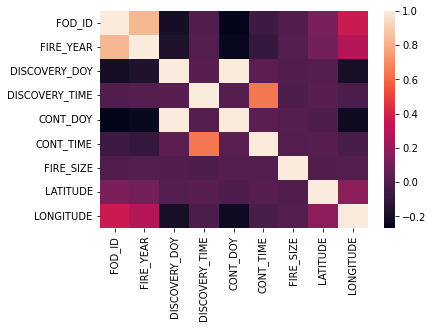

In [49]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

preds = tree_model.predict(x_test)

In [ ]:
KNN

In [45]:
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131269 entries, 0 to 131268
Data columns (total 45 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  131269 non-null  object 
 1   NAME     131269 non-null  object 
 2   DATE     131269 non-null  object 
 3   AWND     87071 non-null   float64
 4   DAWM     2 non-null       float64
 5   FMTM     36212 non-null   float64
 6   MDWM     2 non-null       float64
 7   PGTM     50957 non-null   float64
 8   PRCP     126477 non-null  float64
 9   TAVG     31231 non-null   float64
 10  TMAX     130897 non-null  float64
 11  TMIN     130888 non-null  float64
 12  TOBS     42475 non-null   float64
 13  WDF1     516 non-null     float64
 14  WDF2     79937 non-null   float64
 15  WDF5     79837 non-null   float64
 16  WDFG     3433 non-null    float64
 17  WDMV     1166 non-null    float64
 18  WSF1     516 non-null     float64
 19  WSF2     79937 non-null   float64
 20  WSF5     79882 non-null   

,STATION,NAME,DATE,AWND,DAWM,FMTM,MDWM,PGTM,PRCP,TAVG,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV20
0,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00003016,"RIFLE GARFIELD CO AIRPORT, CO US",1997-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Determine closest station

array(['RIFLE GARFIELD CO AIRPORT, CO US',
       'CRAIG MOFFAT CO AIRPORT, CO US',
       'ASPEN PITKIN CO AIRPORT SARDY FIELD, CO US', 'LIMON, CO US',
       'GEORGETOWN, CO US', 'MONTROSE REGIONAL AIRPORT, CO US',
       'LEROY 5 WSW, CO US', 'CROOK, CO US', 'GRAND LAKE 6 SSW, CO US',
       'MEEKER AIRPORT, CO US', 'CORTEZ MONTEZUMA CO AIRPORT, CO US',
       'COLORADO SPRINGS MUNICIPAL AIRPORT, CO US',
       'DURANGO LA PLATA CO AIRPORT, CO US', 'TRINIDAD AIRPORT, CO US',
       'LEADVILLE LAKE CO AIRPORT, CO US'], dtype=object)

In [ ]:
# for row in df_co
# determine which weather is closest
# use weather data from that site

In [50]:
cols = df_co.columns
target_col = 'FIRE_SIZE'
feat_cols = [c for c in cols if c != target_col]

array = df_co.values

X = array[:, 1:5]
y = array[:, 0]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

ValueError: could not convert string to float: 'W-545077'